# 

# <center> OPTIMIZERS

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

## Utils

In [2]:
# Função para gerar dados de exemplo
def generate_data(num_points=10):
    np.random.seed(42)
    X = 2 * np.random.rand(num_points, 1)
    y = 4 + 3 * X + np.random.randn(num_points, 1)
    return X, y

# Função de custo (Erro Quadrático Médio)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Adicionando o termo de bias aos dados
def add_bias_feature(X):
    return np.c_[np.ones((len(X), 1)), X]

---

# GD - Gradient Descent

#### Math
#### $ w_{t+1} = w_{t} - \alpha * \Delta w_{t} * L * (w_{t})  $

#### Funcionamento
* Calcula os gradientes usando todo o conjunto de dados
* Atualiza os parâmetros na direção oposta ao gradiente da função de custo em relação aos parâmetros.

#### Hiperparametros
* Taxa de aprendizado
* Número de iterações

#### Vantagens
* Simplicidade conceitual.

#### Desvantagens
* Pode ser lento em convergir, especialmente em grandes conjuntos de dados.

In [3]:
# Gradiente Descendente
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)

    for i in range(num_iterations):
        #print('theta_1:', theta)
        predictions = X.dot(theta)
        #print('predictions:', predictions)
        errors = predictions - y
        #print('errors:', errors)
        gradient = X.T.dot(errors) / m
        #print('gradient:', list(gradient))
        theta = theta - learning_rate * gradient
        #print('theta:', theta)
        cost_history[i] = compute_cost(X, y, theta)
        

    return theta, cost_history

In [4]:
# Configuração dos dados
X, y = generate_data()
X_b = add_bias_feature(X)

# Inicialização dos parâmetros
theta_initial = np.random.randn(2, 1)

# Parâmetros do Gradiente Descendente
learning_rate = 0.01
num_iterations = 100

# Aplicando o Gradiente Descendente
theta_final, cost_history = gradient_descent(X_b, y, theta_initial, learning_rate, num_iterations)

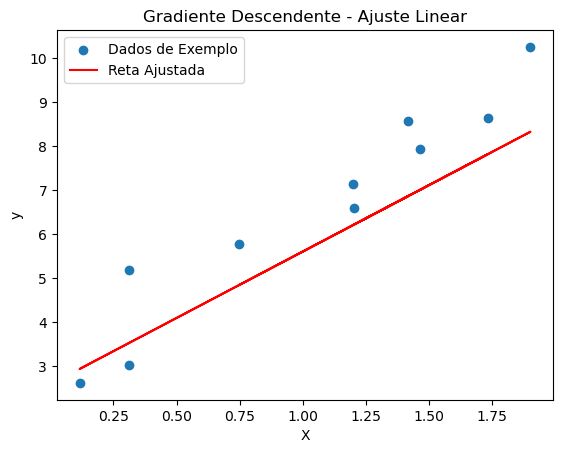

In [5]:
# Visualização dos dados e da reta ajustada
plt.scatter(X, y, label='Dados de Exemplo')
plt.plot(X, X_b.dot(theta_final), color='red', label='Reta Ajustada')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Gradiente Descendente - Ajuste Linear')
plt.show()

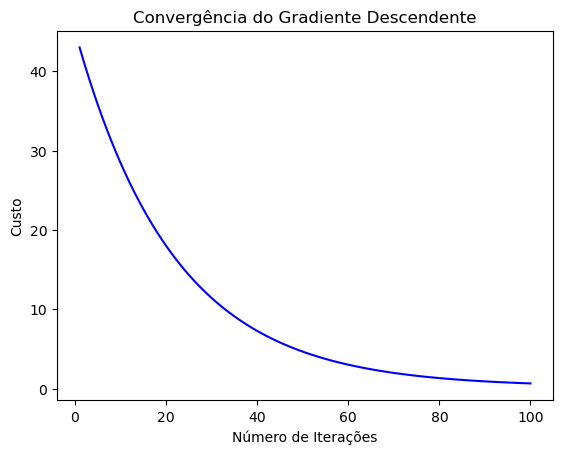

Parâmetros finais theta: [[2.58935959]
 [3.01520678]]


In [6]:
# Visualização da convergência da função de custo
plt.plot(range(1, num_iterations + 1), cost_history, color='blue')
plt.xlabel('Número de Iterações')
plt.ylabel('Custo')
plt.title('Convergência do Gradiente Descendente')
plt.show()

# Exibindo os parâmetros finais
print("Parâmetros finais theta:", theta_final)

---

# SGD - Stochastic Gradient Descent

#### Math
#### $ w_{t+1} = w_{t} - \alpha * \Delta w_{t} * L * (w_{t})  $

#### Funcionamento
* Calcula os gradientes usando todo um subconjunto aleatório dos dados
* Atualiza os parâmetros na direção oposta ao gradiente da função de custo em relação aos parâmetros.

#### Hiperparametros
* Taxa de aprendizado
* Número de iterações
* Tamanho do bach

#### Vantagens
* Simplicidade conceitual
* Eficiente em grandes conjuntos de dados

#### Desvantagens
* Alta variabilidade nas atualizações devido à natureza estocástica, o que pode dificultar a convergência
* A função de custo pode ser muito sensível a um parâmetro resistente a outro fazendo com que exista grande variação em uma direção e pouca em outra, dificultando a convergência
* Pode apresentar problemas com mínimos locais e pontos de sela

In [7]:
# Stochastic Gradient Descent com Batch
def batch_gradient_descent(X, y, theta, learning_rate, num_iterations, batch_size):
    m = len(y)
    cost_history = np.zeros(num_iterations)

    for i in range(num_iterations):
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]

            predictions = X_batch.dot(theta)
            errors = predictions - y_batch
            gradient = X_batch.T.dot(errors) / batch_size
            theta = theta - learning_rate * gradient

        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [8]:
# Configuração dos dados
X, y = generate_data()
X_b = add_bias_feature(X)

# Inicialização dos parâmetros
theta_initial = np.random.randn(2, 1)

# Parâmetros do Stochastic Gradient Descent com Batch
learning_rate = 0.01
num_iterations = 1000
batch_size = 20

# Aplicando o Stochastic Gradient Descent com Batch
theta_final, cost_history = batch_gradient_descent(X_b, y, theta_initial, learning_rate, num_iterations, batch_size)

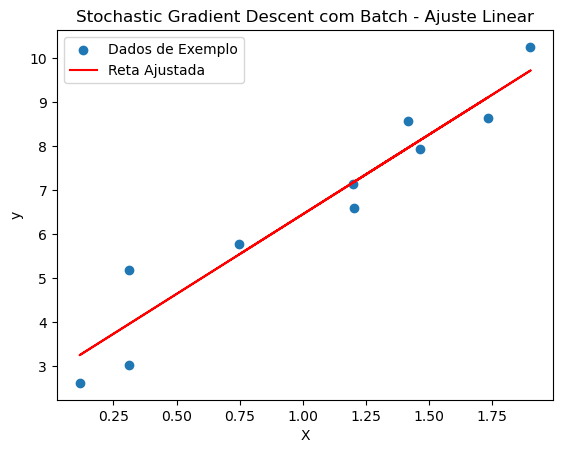

In [9]:
# Visualização dos dados e da reta ajustada
plt.scatter(X, y, label='Dados de Exemplo')
plt.plot(X, X_b.dot(theta_final), color='red', label='Reta Ajustada')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Stochastic Gradient Descent com Batch - Ajuste Linear')
plt.show()

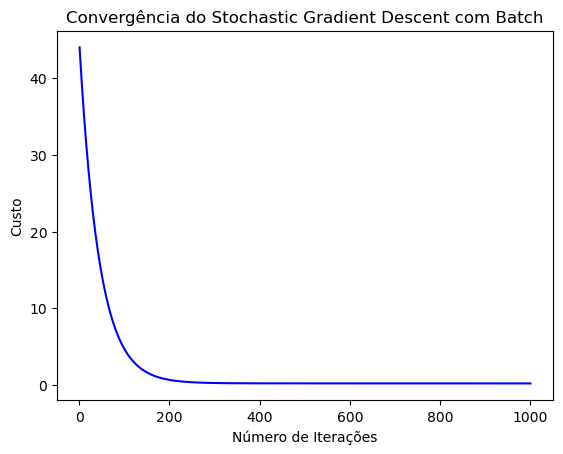

Parâmetros finais theta: [[2.83246774]
 [3.61779957]]


In [10]:
# Visualização da convergência da função de custo
plt.plot(range(1, num_iterations + 1), cost_history, color='blue')
plt.xlabel('Número de Iterações')
plt.ylabel('Custo')
plt.title('Convergência do Stochastic Gradient Descent com Batch')
plt.show()

# Exibindo os parâmetros finais
print("Parâmetros finais theta:", theta_final)

---

# SGD + Momentum

### Math
#### $ V_{t+1} = p_{V_t} - \Delta w_{t} * L * (w_{t})  $
#### $ V_{t+1} = p_{V_t} - \Delta w_{t} * L * (w_{t} + p_{V_t})  $ -- Nesterov
#### $ w_{t+1} = w_{t} - \alpha * V_{t+1}  $

#### Funcionamento
* Adiciona uma média móvel como um termo de momentum à atualização dos parâmetros
* O SGD Momentum de Nesterov computa os gradientes uma posição à frente

#### Hiperparametros
* Taxa de aprendizado
* Número de iterações
* Tamanho do minibach
* Momentum

#### Vantagens
*  Suavizar as oscilações e acelera o aprendizado em direções consistentes
#### Desvantagens
*  O hiperparâmetro taxa de momentum precisa ser ajustado manualmente

In [11]:
# Stochastic Gradient Descent com Momentum
def sgd_with_momentum(X, y, theta, learning_rate, momentum, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    velocity = np.zeros_like(theta)

    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(errors) / m

        velocity = momentum * velocity + learning_rate * gradient
        theta = theta - velocity

        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [12]:
# Configuração dos dados
X, y = generate_data()
X_b = add_bias_feature(X)

# Inicialização dos parâmetros
theta_initial = np.random.randn(2, 1)

# Parâmetros do Stochastic Gradient Descent com Momentum
learning_rate = 0.01
momentum = 0.9
num_iterations = 1000

# Aplicando o Stochastic Gradient Descent com Momentum
theta_final, cost_history = sgd_with_momentum(X_b, y, theta_initial, learning_rate, momentum, num_iterations)

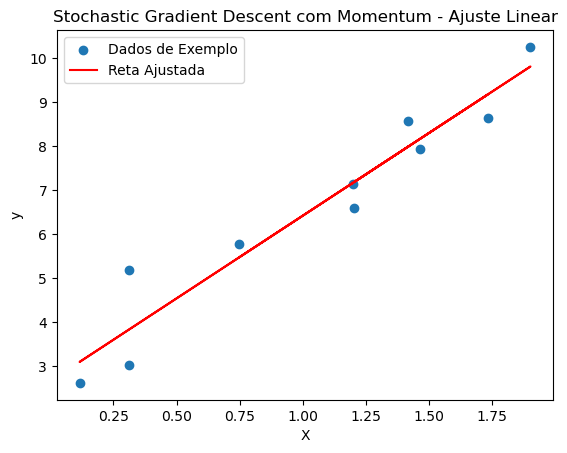

In [13]:
# Visualização dos dados e da reta ajustada
plt.scatter(X, y, label='Dados de Exemplo')
plt.plot(X, X_b.dot(theta_final), color='red', label='Reta Ajustada')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Stochastic Gradient Descent com Momentum - Ajuste Linear')
plt.show()

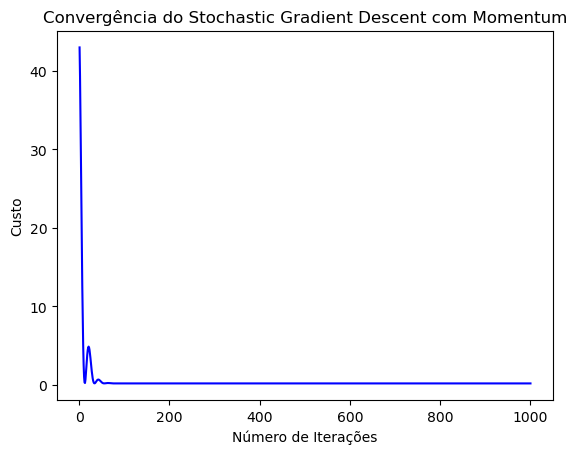

Parâmetros finais theta: [[2.66362132]
 [3.75466866]]


In [14]:
# Visualização da convergência da função de custo
plt.plot(range(1, num_iterations + 1), cost_history, color='blue')
plt.xlabel('Número de Iterações')
plt.ylabel('Custo')
plt.title('Convergência do Stochastic Gradient Descent com Momentum')
plt.show()

# Exibindo os parâmetros finais
print("Parâmetros finais theta:", theta_final)

---

# AdaGrad - Adaptative Gradient Descent

### Math
#### $ squared_{\Delta_{sum}} += \Delta ^ 2 $
#### $ adj_L = L / (\sqrt{(squared_{\Delta_{sum}}) + \epsilon)} $
#### $ w_{t+1} = w_{t} - \alpha * \Delta w_{t} * adj_L * (w_{t})  $

        
#### Funcionamento
* Utiliza taxas de aprendizado adaptativas impedindo a busca em direções de grandes oscilações
    * Reduz a LR para parâmetros com alta variabilidade no gradiente
    * Aumenta a LR para parâmetros com baixa variabilidade no gradiente
* Utiliza um vetor do mesmo tamanho dos parâmetros como cache guardando a soma histórica dos quadrados dos parâmetros reescalando os gradientes individualmente com base no cache
    * Quanto maior o cache menor a atualização e vice-versa

#### Hiperparametros
* Taxa de aprendizado
* Número de iterações
* Epsilon

#### Vantagens
* Impede a busca em direções de grandes oscilações
* Eficiente para lidar com diferentes escalas de parâmetros

#### Desvantagens
* LR decresce monotonicamente, resultando em convergência prematura
* Cache cresce monotonicamente

In [15]:
# Adagrad
def adagrad(X, y, theta, learning_rate, epsilon, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    squared_gradients_sum = np.zeros_like(theta)

    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(errors) / m

        squared_gradients_sum += gradient ** 2
        adjusted_learning_rate = learning_rate / (np.sqrt(squared_gradients_sum) + epsilon)

        theta = theta - adjusted_learning_rate * gradient

        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [16]:
# Configuração dos dados
X, y = generate_data()
X_b = add_bias_feature(X)

# Inicialização dos parâmetros
theta_initial = np.random.randn(2, 1)

# Parâmetros do Adagrad
learning_rate = 0.1
epsilon = 1e-8
num_iterations = 1000

# Aplicando o Adagrad
theta_final, cost_history = adagrad(X_b, y, theta_initial, learning_rate, epsilon, num_iterations)

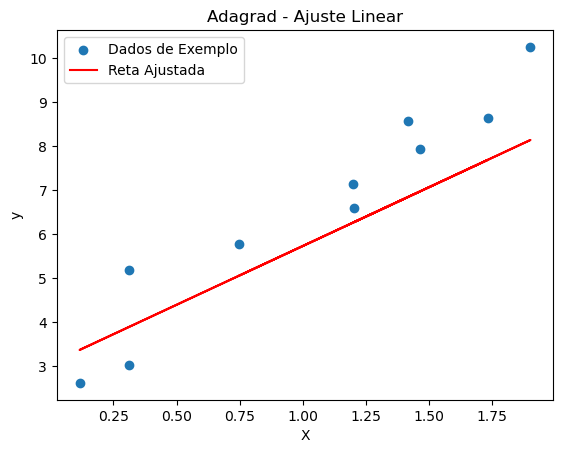

In [17]:
# Visualização dos dados e da reta ajustada
plt.scatter(X, y, label='Dados de Exemplo')
plt.plot(X, X_b.dot(theta_final), color='red', label='Reta Ajustada')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Adagrad - Ajuste Linear')
plt.show()

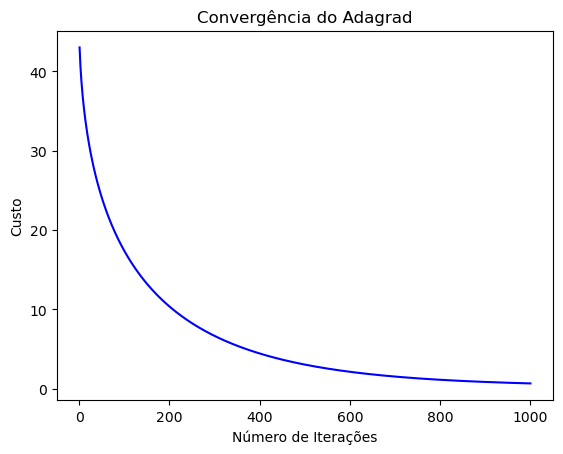

Parâmetros finais theta: [[3.0613841 ]
 [2.66878786]]


In [18]:
# Visualização da convergência da função de custo
plt.plot(range(1, num_iterations + 1), cost_history, color='blue')
plt.xlabel('Número de Iterações')
plt.ylabel('Custo')
plt.title('Convergência do Adagrad')
plt.show()

# Exibindo os parâmetros finais
print("Parâmetros finais theta:", theta_final)

---

# RMSProp - Root Mean Square Propogation

### Math
#### $ squared_{\Delta_{sum}} = decayrate * squared_{\Delta_{sum}} + (1-decayrate) * \Delta ^ 2 $
#### $ adj_L = L / (\sqrt{(squared_{\Delta_{sum}}) + \epsilon)} $
#### $ w_{t+1} = w_{t} - \alpha * \Delta w_{t} * adj_L * (w_{t})  $

        
#### Funcionamento
* Similar ao Adagrad, mas usa uma média móvel ponderada dos quadrados dos gradientes recentes para adaptar a taxa de aprendizado.

#### Hiperparametros
* Taxa de aprendizado
* Número de iterações
* Taxa de decaimento
* Epsilon

#### Vantagens
* Lida melhor com o problema da taxa de aprendizado diminuindo muito rapidamente

#### Desvantagens
* Ainda pode sofrer de convergência prematura em alguns casos

In [19]:
# RMSProp
def rmsprop(X, y, theta, learning_rate, decay_rate, epsilon, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    squared_gradients_sum = np.zeros_like(theta)

    for i in range(num_iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(errors) / m

        squared_gradients_sum = decay_rate * squared_gradients_sum + (1 - decay_rate) * gradient ** 2
        adjusted_learning_rate = learning_rate / (np.sqrt(squared_gradients_sum) + epsilon)

        theta = theta - adjusted_learning_rate * gradient

        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [20]:
# Configuração dos dados
X, y = generate_data()
X_b = add_bias_feature(X)

# Inicialização dos parâmetros
theta_initial = np.random.randn(2, 1)

# Parâmetros do RMSProp
learning_rate = 0.1
decay_rate = 0.9
epsilon = 1e-8
num_iterations = 1000

# Aplicando o RMSProp
theta_final, cost_history = rmsprop(X_b, y, theta_initial, learning_rate, decay_rate, epsilon, num_iterations)

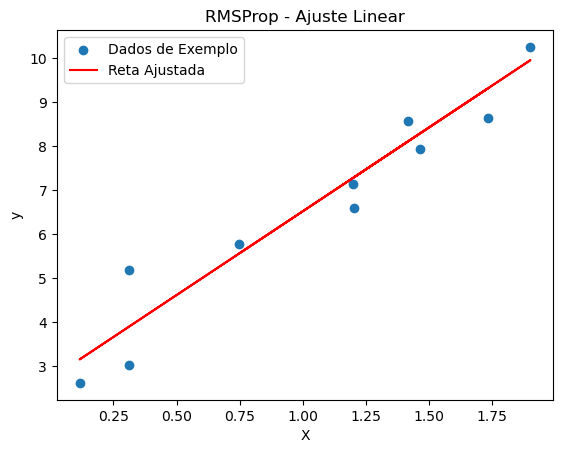

In [21]:
# Visualização dos dados e da reta ajustada
plt.scatter(X, y, label='Dados de Exemplo')
plt.plot(X, X_b.dot(theta_final), color='red', label='Reta Ajustada')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('RMSProp - Ajuste Linear')
plt.show()

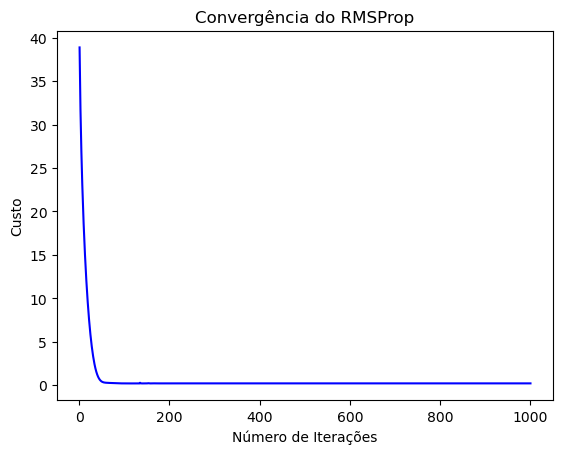

Parâmetros finais theta: [[2.71362132]
 [3.80466866]]


In [22]:
# Visualização da convergência da função de custo
plt.plot(range(1, num_iterations + 1), cost_history, color='blue')
plt.xlabel('Número de Iterações')
plt.ylabel('Custo')
plt.title('Convergência do RMSProp')
plt.show()

# Exibindo os parâmetros finais
print("Parâmetros finais theta:", theta_final)

---

# Adam

### Math
#### $ m_t = \beta_1 * m_t + (1 - \beta_1) * gradient $
#### $ v_t = \beta_2 * v_t + (1 - \beta_2) * gradient ^ 2 $
#### $ m_{t hat} = m_t / (1 - \beta_1 ^ t) $
#### $ v_{t hat} = v_t / (1 - \beta_2 ^ t) $
#### $ w_{t+1} = w_{t} - L * m_{t hat} / \sqrt{(v_{t hat}) + \epsilon} $
        
#### Funcionamento
* Combina elementos de momentum e RMSProp, usando médias móveis tanto dos gradientes quanto dos quadrados dos gradientes.

#### Hiperparametros
* Taxa de aprendizado
* Número de iterações
* Beta 1 -- Momentum
* Beta -- Taxa de decaimento
* Epsilon

#### Vantagens
* Eficiente em termos computacionais, adaptativo e geralmente converge mais rapidamente

#### Desvantagens
* Introduz hiperparâmetros (taxa de aprendizado, decaimento de primeira e segunda ordem) que precisam ser ajustados.

In [23]:
# Adam
def adam(X, y, theta, learning_rate, beta1, beta2, epsilon, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    m_t = np.zeros_like(theta)
    v_t = np.zeros_like(theta)
    t = 0

    for i in range(num_iterations):
        t += 1
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(errors) / m

        m_t = beta1 * m_t + (1 - beta1) * gradient
        v_t = beta2 * v_t + (1 - beta2) * gradient ** 2

        m_t_hat = m_t / (1 - beta1 ** t)
        v_t_hat = v_t / (1 - beta2 ** t)

        theta = theta - learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon)

        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [24]:
# Configuração dos dados
X, y = generate_data()
X_b = add_bias_feature(X)

# Inicialização dos parâmetros
theta_initial = np.random.randn(2, 1)

# Parâmetros do Adam
learning_rate = 0.01
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
num_iterations = 1000

# Aplicando o Adam
theta_final, cost_history = adam(X_b, y, theta_initial, learning_rate, beta1, beta2, epsilon, num_iterations)

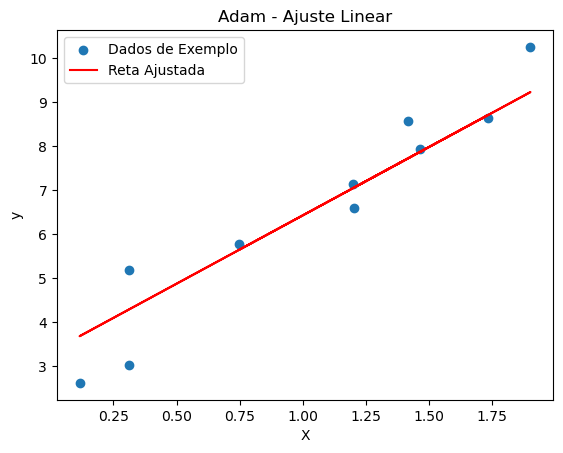

In [25]:
# Visualização dos dados e da reta ajustada
plt.scatter(X, y, label='Dados de Exemplo')
plt.plot(X, X_b.dot(theta_final), color='red', label='Reta Ajustada')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Adam - Ajuste Linear')
plt.show()

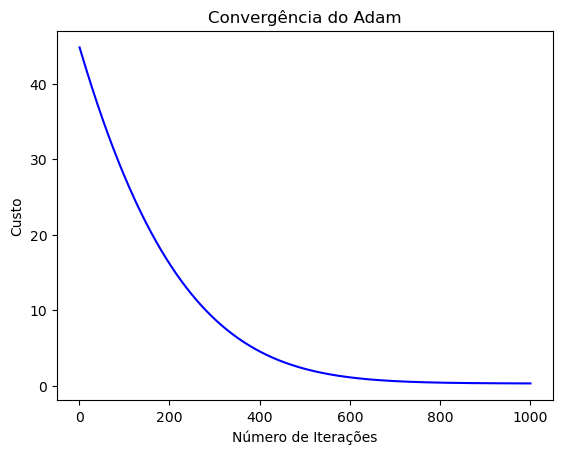

Parâmetros finais theta: [[3.32279346]
 [3.10283403]]


In [26]:
# Visualização da convergência da função de custo
plt.plot(range(1, num_iterations + 1), cost_history, color='blue')
plt.xlabel('Número de Iterações')
plt.ylabel('Custo')
plt.title('Convergência do Adam')
plt.show()

# Exibindo os parâmetros finais
print("Parâmetros finais theta:", theta_final)


---